# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Hypothesis
from scipy.stats import shapiro, ttest_ind, kruskal, norm

pd.set_option('display.max_columns', None)

# #Dataset Overview

In [ ]:
!gdown 1qL5pqjPMkfNVk4AyfJNIxpBwWu6oulDK

## https://drive.google.com/file/d/1qL5pqjPMkfNVk4AyfJNIxpBwWu6oulDK/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1qL5pqjPMkfNVk4AyfJNIxpBwWu6oulDK
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 141MB/s]


In [ ]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df[df['trip_uuid'] == 'trip-153741093647649320'].head(20)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


## Dataset Structure

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

* There are 11 Numerical cols
* There are 8 object cols
* There are 4 datetime cols
* One col is Boolean
* There are NaNs

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# converting datetime col to datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
# df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])
# df['trip_end_time'] = pd.to_datetime(df['trip_end_time'])
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


In [ ]:
df_num = df.select_dtypes(include='number')
df_num.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df_obj = df.select_dtypes(include='object')
df_obj.describe()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,cutoff_timestamp
count,144867,144867,144867,144867,144867,144574,144867,144606,144867
unique,2,1504,2,14817,1508,1498,1481,1468,93180
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-24 05:19:20
freq,104858,1812,99660,101,23347,23347,15192,15192,40


## Checking NaNs

In [ ]:
all_nans = pd.DataFrame({ '% NaNs': np.round((df.isna().sum()/df.shape[0]) * 100, 2),
                            'Total NaNs' : df.isna().sum() })
all_nans = all_nans[all_nans['% NaNs'] > 0]
all_nans

,% NaNs,Total NaNs
source_name,0.20,293
destination_name,0.18,261


## Name and IDs of Destination & Source

In [ ]:
df.groupby('source_center')['source_name'].nunique().sort_values(ascending=False)

,source_name
source_center,
IND000000AAL,1
IND585222AAA,1
IND587103AAB,1
IND586211AAA,1
IND586128AAA,1
...,...
IND852118A1B,0
IND126116AAA,0
IND331022A1B,0


In [ ]:
df.groupby('destination_center')['destination_name'].nunique().sort_values(ascending=False)

,destination_name
destination_center,
IND000000AAL,1
IND583201AAA,1
IND585307AAB,1
IND585222AAA,1
IND585211AAA,1
...,...
IND841301AAC,0
IND342902A1B,0
IND282002AAD,0


In [ ]:
df = df.drop(['source_name', 'destination_name'], axis=1)


In [ ]:
all_nans = pd.DataFrame({ '% NaNs': np.round((df.isna().sum()/df.shape[0]) * 100, 2),
                            'Total NaNs' : df.isna().sum() })
all_nans = all_nans[all_nans['% NaNs'] > 0]
all_nans

,% NaNs,Total NaNs


* Source Name and Desitnation Names are redundant (and have few NaNs), Source IDs and Destination IDs represent same information
* Therefore, Source and Destination Names have been Dropped. There are no NaNs in DataFrame now.

## Trips and Source Destination

In [ ]:
df['source_destination_pair'] = df.apply(lambda row: '-'.join(sorted([row['source_center'], row['destination_center']])), axis=1)
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_destination_pair
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,IND388121AAA-IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,IND388121AAA-IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,IND388121AAA-IND388620AAB


In [ ]:
df.groupby('trip_uuid')['source_destination_pair'].nunique().sort_values(ascending=False)

,source_destination_pair
trip_uuid,
trip-153758895506669465,8
trip-153710494321650505,8
trip-153717306559016761,8
trip-153818467050084470,7
trip-153834387311147595,7
...,...
trip-153768244499086577,1
trip-153768248622932984,1
trip-153768254783010281,1


* A trip can have multiple Source Destination pairs

In [ ]:
df[df['source_center'] == df['destination_center']]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_destination_pair


In [ ]:
df['source_destination_pair'].nunique()

2344

* A trip can have multiple source destination pairs.
* There are no trips that have same Source and Destination, so Dataset is consistent in this aspect.
* There are a total of 2344 Source Destination pairs

## Route Schedules and Trips

In [ ]:
# are route schedules nunique 1 for each trip
unique_route_schedule = df.groupby('trip_uuid')['route_schedule_uuid'].nunique()
unique_route_schedule.sort_values(ascending=False)

,route_schedule_uuid
trip_uuid,
trip-153671041653548748,1
trip-153791331656620454,1
trip-153791340002649773,1
trip-153791341220571147,1
trip-153791345208672550,1
...,...
trip-153730385530436915,1
trip-153730387256906443,1
trip-153730391233462064,1


In [ ]:
# for every route there should be multiple trips
unique_trips = df.groupby('route_schedule_uuid')['trip_uuid'].nunique()
unique_trips.sort_values(ascending=False)

,trip_uuid
route_schedule_uuid,
thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6,53
thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5fca03,46
thanos::sroute:c736b86f-5c1d-4497-832c-876db4c1a518,43
thanos::sroute:ca336899-47aa-4622-9885-b9fbb2302aeb,41
thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b605d343,40
...,...
thanos::sroute:5da5f916-9dc5-4c1a-8e6c-74046aa0e970,1
thanos::sroute:584fd299-224e-457e-8607-51294e0872ac,1
thanos::sroute:5740b418-5415-46b6-9548-3d340fa42599,1


In [ ]:
# taking a sample route schedule for analysis
unique_trips[unique_trips >= 3].sort_values(ascending=True)     # Filtering pd series

,trip_uuid
route_schedule_uuid,
thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a85774de45,3
thanos::sroute:e5ea467f-893d-4ee5-9fa6-349949268159,3
thanos::sroute:f6038101-df57-47fd-85a9-6c24732cfc01,3
thanos::sroute:7fe7088b-1afa-4cce-b974-8fac94a5ac1d,3
thanos::sroute:53522ad3-56b3-4ec1-8f0a-1f380328cb8a,3
...,...
thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b605d343,40
thanos::sroute:ca336899-47aa-4622-9885-b9fbb2302aeb,41
thanos::sroute:c736b86f-5c1d-4497-832c-876db4c1a518,43


In [ ]:
print(f"There are {df[(df['route_schedule_uuid'] == 'thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a85774de45') & (df['data'] == 'training')].shape[0]} rows in Training sample of Route - thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a85774de45")

df[(df['route_schedule_uuid'] == 'thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a85774de45') & (df['data'] == 'training')].head()


There are 6 rows in Training sample of Route - thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a85774de45


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_destination_pair
130784,training,2018-09-15 06:05:44.791647,thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a8577...,Carting,trip-153699154538562821,IND600044AAD,IND600056AAB,2018-09-15 06:05:44.791647,2018-09-15 08:05:53.497074,120.0,True,9,2018-09-15 07:45:24,9.929235,14.0,11.0,12.3256,1.272727,14.0,11.0,12.3256,1.272727,IND600044AAD-IND600056AAB
130785,training,2018-09-15 06:05:44.791647,thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a8577...,Carting,trip-153699154538562821,IND600044AAD,IND600056AAB,2018-09-15 06:05:44.791647,2018-09-15 08:05:53.497074,120.0,True,18,2018-09-15 06:43:31,18.111918,75.0,18.0,21.8735,4.166667,61.0,7.0,9.5479,8.714286,IND600044AAD-IND600056AAB
130786,training,2018-09-15 06:05:44.791647,thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a8577...,Carting,trip-153699154538562821,IND600044AAD,IND600056AAB,2018-09-15 06:05:44.791647,2018-09-15 08:05:53.497074,120.0,False,25,2018-09-15 06:19:29,25.142773,99.0,35.0,36.3874,2.828571,24.0,21.0,18.9088,1.142857,IND600044AAD-IND600056AAB
136348,training,2018-09-21 09:06:32.068908,thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a8577...,Carting,trip-153752079206866206,IND600044AAD,IND600056AAB,2018-09-21 09:06:32.068908,2018-09-21 10:32:08.359911,85.0,True,9,2018-09-21 10:09:24,9.627736,15.0,11.0,12.0172,1.363636,15.0,11.0,12.0172,1.363636,IND600044AAD-IND600056AAB
136349,training,2018-09-21 09:06:32.068908,thanos::sroute:706c6e84-0bcf-41d6-9d05-a5a8577...,Carting,trip-153752079206866206,IND600044AAD,IND600056AAB,2018-09-21 09:06:32.068908,2018-09-21 10:32:08.359911,85.0,True,18,2018-09-21 09:55:33,18.104821,29.0,18.0,21.8675,1.611111,13.0,7.0,9.8503,1.857143,IND600044AAD-IND600056AAB


In [ ]:
df[df['trip_uuid'] == 'trip-153741093647649320'].shape

df[df['trip_uuid'] == 'trip-153741093647649320']['route_schedule_uuid'].unique()

array(['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'],
      dtype=object)

* Each Trip has a single Route Schedule
* A Route Schedule can have multiple Trips

## Route Schedules with Source-Destinations

In [ ]:
pair_counts = df.groupby('source_destination_pair')[['route_schedule_uuid']].nunique().sort_values(by = 'route_schedule_uuid', ascending=False).reset_index()
pair_counts

,source_destination_pair,route_schedule_uuid
0,IND560099AAB-IND562132AAA,34
1,IND560099AAB-IND560300AAA,23
2,IND411033AAA-IND421302AAG,19
3,IND560300AAA-IND562132AAA,18
4,IND000000ACB-IND110044AAB,13
...,...,...
2339,IND410501AAF-IND411033AAA,1
2340,IND410501AAF-IND410505AAB,1
2341,IND410401AAA-IND421302AAG,1
2342,IND403726AAA-IND581400AAB,1


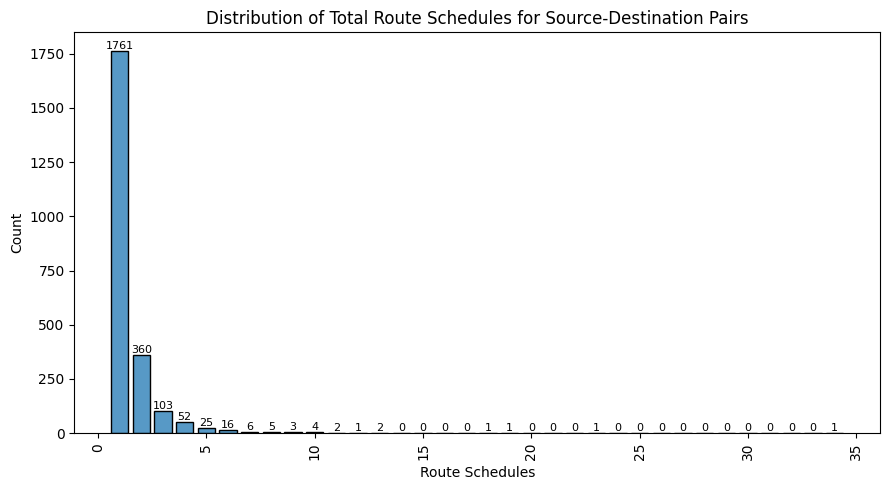

In [ ]:
# Plotting the countplot
plt.figure(figsize=(9, 5))

ax = sns.histplot(data=pair_counts['route_schedule_uuid'], discrete=True, shrink=0.8)    # , order=df['source_destination_pair'].value_counts().index


# Add y-value labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height()}',
            ha='center', va='bottom', fontsize=8)

# Labels and title
plt.xlabel('Route Schedules')
plt.ylabel('Count')
plt.title('Distribution of Total Route Schedules for Source-Destination Pairs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

* 1761 Routes of 2344 Routes have 1 Route Schedule.
* 360 Routes of 2344 Routes have 2 Route Schedule.
* 103 Routes of 2344 Routes have 3 Route Schedule.

## Trip Creation Dates

In [ ]:
df['trip_creation_date'] = df['trip_creation_time'].dt.date
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_destination_pair,trip_creation_date
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,IND388121AAA-IND388620AAB,2018-09-20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,IND388121AAA-IND388620AAB,2018-09-20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,IND388121AAA-IND388620AAB,2018-09-20


In [ ]:
pd.Series(df['trip_creation_date'].unique()).sort_values(ascending=True).reset_index(drop=True)

,0
0,2018-09-12
1,2018-09-13
2,2018-09-14
3,2018-09-15
4,2018-09-16
5,2018-09-17
6,2018-09-18
7,2018-09-19
8,2018-09-20
9,2018-09-21


* We have data for 21 days from 12th Sept to 3rd Oct 2018
* Since we only have about 3 Weeks of Data, data is insufficeint for Weekly and Daily (Mon-Sun) will not be sufficient for analysis

## Trip Creation Hours

In [ ]:
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_destination_pair,trip_creation_date,trip_creation_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,IND388121AAA-IND388620AAB,2018-09-20,2
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,IND388121AAA-IND388620AAB,2018-09-20,2
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,IND388121AAA-IND388620AAB,2018-09-20,2


In [ ]:
pd.Series(df['trip_creation_hour'].unique()).sort_values(ascending=True).reset_index(drop=True)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


* As expected, we have Data for all 24 hours

<Axes: xlabel='trip_creation_hour', ylabel='Count'>

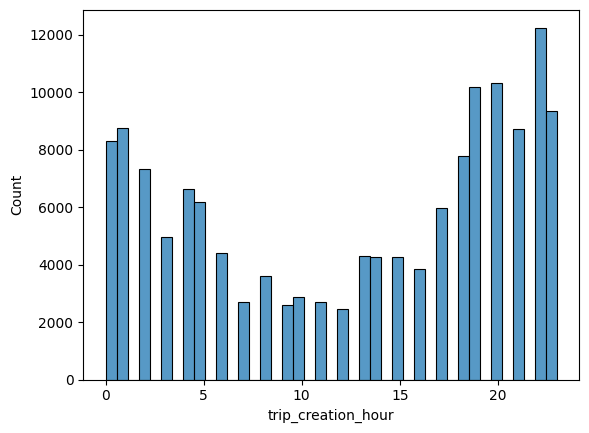

In [ ]:
sns.histplot(df['trip_creation_hour'])

## Datetime Variables

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'source_destination_pair', 'trip_creation_date', 'trip_creation_hour'],
      dtype='object')

In [ ]:
print(np.all(df['trip_creation_time'] > df['od_start_time']), np.all(df['trip_creation_time'] > df['od_start_time']))

False False


## Order Creation Delay

In [ ]:
df['order_creation_delay'] = df['od_start_time'] - df['trip_creation_time']
df['order_creation_delay'] = df['order_creation_delay'].dt.total_seconds() / 60
df['order_creation_delay']

,order_creation_delay
0,45.932363
1,45.932363
2,45.932363
3,45.932363
4,45.932363
...,...
144862,0.000000
144863,0.000000
144864,0.000000
144865,0.000000


<Axes: xlabel='order_creation_delay', ylabel='Count'>

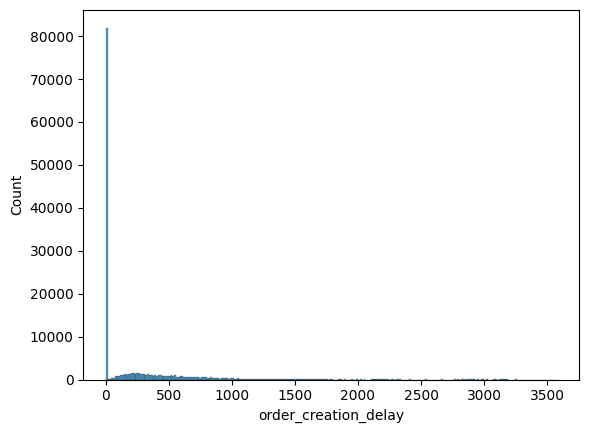

In [ ]:
sns.histplot(df['order_creation_delay'])


<Axes: ylabel='order_creation_delay'>

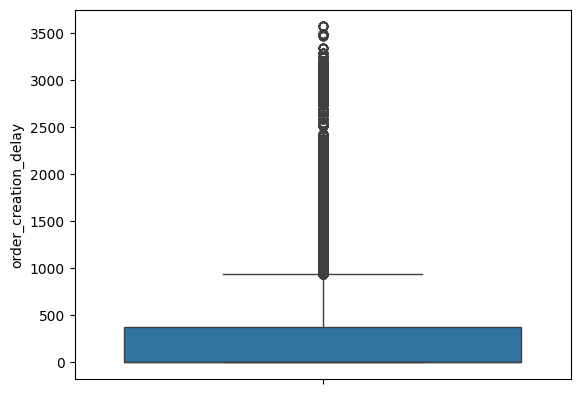

In [ ]:
sns.boxplot(df['order_creation_delay'])

In [ ]:
df[df['order_creation_delay'] < 0]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_destination_pair,trip_creation_date,trip_creation_hour,order_creation_delay


In [ ]:
df[['trip_creation_time', 'od_start_time']].head()      # order ---> packaging etc, after trip is created

,trip_creation_time,od_start_time
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600


# Delivery Speeds

## Cart Deliveries

### Distribution

<ipython-input-578-4be873bbf4cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cart['delivery_speed'] = df_cart['actual_distance_to_destination'] / df_cart['actual_time']


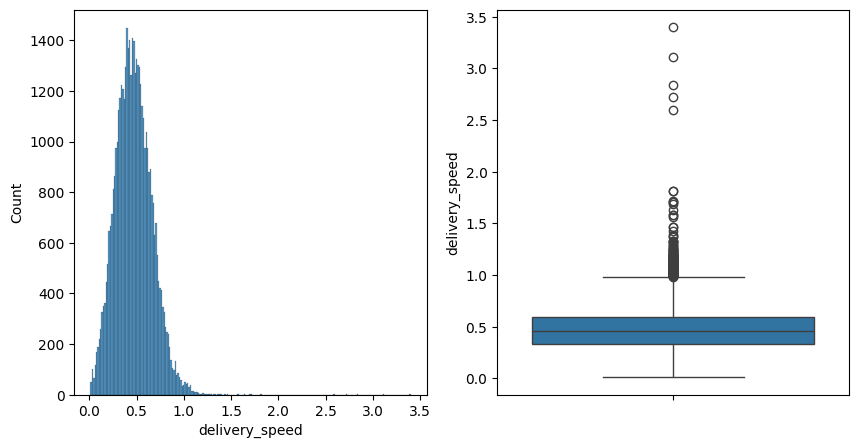

In [ ]:
df_cart = df[df['route_type'] == 'Carting']
df_cart['delivery_speed'] = df_cart['actual_distance_to_destination'] / df_cart['actual_time']


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cart['delivery_speed'])    # , bins=100

plt.subplot(1, 2, 2)
sns.boxplot(df_cart['delivery_speed'])    # , bins=100

plt.show()

In [ ]:
print(f"Skewness of Delivery Speeds are {np.round(df_cart['delivery_speed'].skew(), 2)}")
print(f"Kurtosis of Delivery Speeds are {np.round(df_cart['delivery_speed'].kurt(), 2)}")

print(f"Mean of Delivery Speeds are {np.round(df_cart['delivery_speed'].mean(), 2)}")
print(f"Median of Delivery Speeds are {np.round(df_cart['delivery_speed'].median(), 2)}")


Skewness of Delivery Speeds are 0.61
Kurtosis of Delivery Speeds are 3.58
Mean of Delivery Speeds are 0.47
Median of Delivery Speeds are 0.46


* With skewness of 0.61, The Delivery speed is slightly right skewed
* Kurtosis of 3.57, Delivery Speeds are highly peaked, so they have large number of outliers

In [ ]:
stat, p = shapiro(df_cart['delivery_speed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.982, p=0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45207.
  res = hypotest_fun_out(*samples, **kwds)


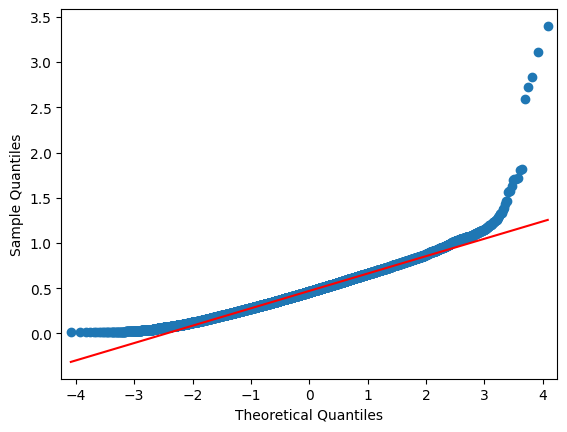

In [ ]:
qqplot(df_cart['delivery_speed'], line='s')
plt.show()

* QQ Plot also suggests there are Outliers in Delivery Speeds, the Distribution is near to Gaussian Distribution
* Shapiro Test is not valid, as total size of dataset is very large (>5000 rows)

In [ ]:
q1 = df_cart['delivery_speed'].quantile(0.25)
q3 = df_cart['delivery_speed'].quantile(0.75)
iqr = q3 - q1

print( f"There are {np.round( df_cart[   ((df_cart['delivery_speed'] > (q3 + 1.5*iqr)) | (df_cart['delivery_speed'] < (q1 - 1.5*iqr) ))].shape[0] / df_cart.shape[0] * 100  , 2)}% Outliers in Delivery Speeds")

# Removing Outliers
print(f"Rows before Outliers {df_cart.shape[0]}")
df_cart = df_cart[ ~ ((df_cart['delivery_speed'] >= (q3 + 1.5*iqr)) | (df_cart['delivery_speed'] <= (q1 - 1.5*iqr) ))]
print(f"Rows after Outliers {df_cart.shape[0]}")


There are 0.83% Outliers in Delivery Speeds
Rows before Outliers 45207
Rows after Outliers 44834


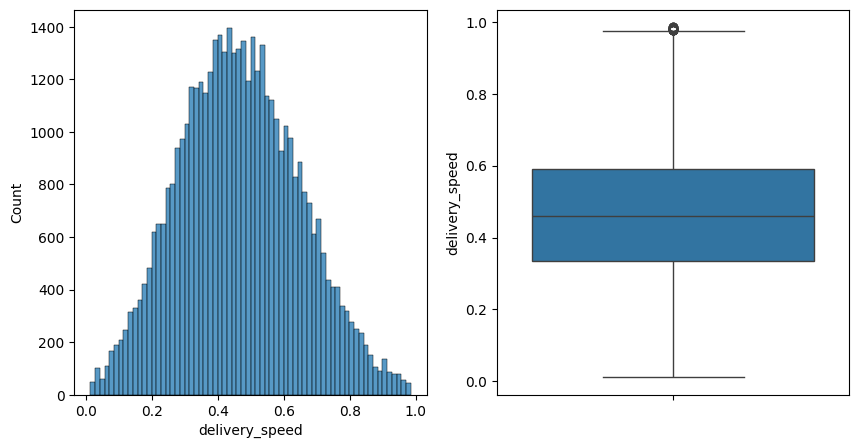

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cart['delivery_speed'])    # , bins=100

plt.subplot(1, 2, 2)
sns.boxplot(df_cart['delivery_speed'])    # , bins=100

plt.show()

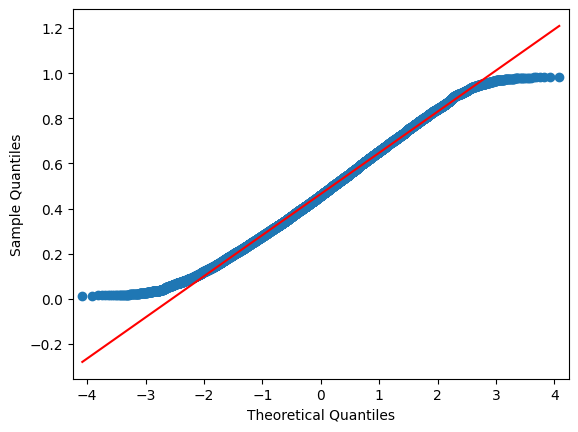

In [ ]:
qqplot(df_cart['delivery_speed'], line='s')
plt.show()

* After Outlier removal, QQ suggests deviation from Normal Distribution.
* So the Distribution of delivery Speeds is not Normal.

### Source-Destination Delivery Speeds

In [ ]:
df_temp = df_cart.groupby(['source_destination_pair']).agg({'delivery_speed': 'mean'}).reset_index().rename(columns={'delivery_speed': 'avg_delivery_speed'})   # 'trip_uuid'
print(df_temp.shape)
df_temp.head()

(837, 2)


,source_destination_pair,avg_delivery_speed
0,IND000000AAL-IND411033AAA,0.246258
1,IND000000AAQ-IND700028AAB,0.141828
2,IND000000ABA-IND683511AAA,0.545472
3,IND000000ABA-IND683565AAA,0.371224
4,IND000000ABG-IND501359AAF,0.329988


* Carting service is provided in 837 Source Destination Pairs

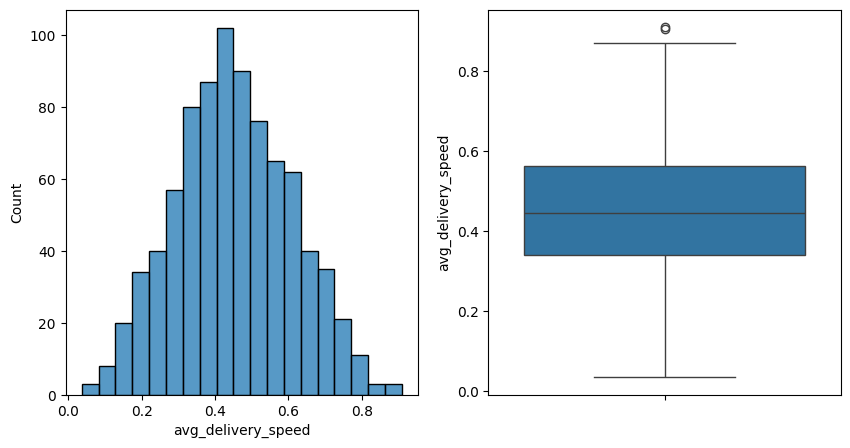

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_temp['avg_delivery_speed'])    # , bins=100

plt.subplot(1, 2, 2)
sns.boxplot(df_temp['avg_delivery_speed'])    # , bins=100

plt.show()

In [ ]:
stat, p_val = shapiro(df_temp['avg_delivery_speed'])

if p_val < 0.03:
  print(f'With {p_val} and 97% confidence, Delivery Speeds are not Normal Distributed')
else:
  print(f'With {p_val} and 97% confidence, Delivery Speeds are Normal Distributed')


With 0.034403742642202875 and 97% confidence, Delivery Speeds are Normal Distributed


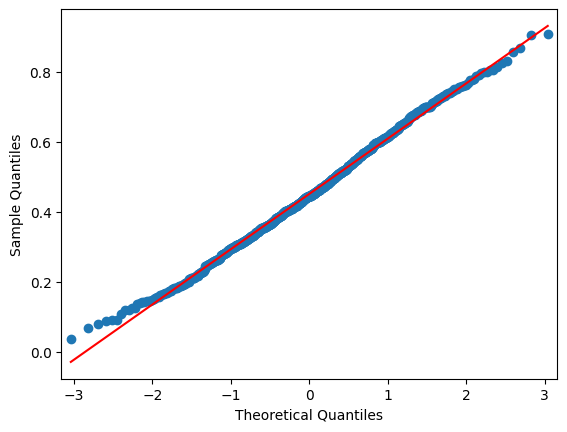

In [ ]:
qqplot(df_temp['avg_delivery_speed'], line='s')
plt.show()

In [ ]:
print(df_temp['avg_delivery_speed'].skew(), df_temp['avg_delivery_speed'].kurt())

0.11410093993095705 -0.36821247982309213


### Binning Delivery Speeds

In [ ]:
m = max(df_temp['avg_delivery_speed'])

bins = [0.0, 0.3, 0.65, m]
labels = ['Slow', 'Medium', 'Fast']

df_temp['delivery_speed_bin'] = pd.cut(df_temp['avg_delivery_speed'], bins=bins, labels = labels)
df_temp.head()

,source_destination_pair,avg_delivery_speed,delivery_speed_bin
0,IND000000AAL-IND411033AAA,0.246258,Slow
1,IND000000AAQ-IND700028AAB,0.141828,Slow
2,IND000000ABA-IND683511AAA,0.545472,Medium
3,IND000000ABA-IND683565AAA,0.371224,Medium
4,IND000000ABG-IND501359AAF,0.329988,Medium


In [ ]:
s = df_temp['delivery_speed_bin'].value_counts()
s

,count
delivery_speed_bin,
Medium,597
Slow,142
Fast,98


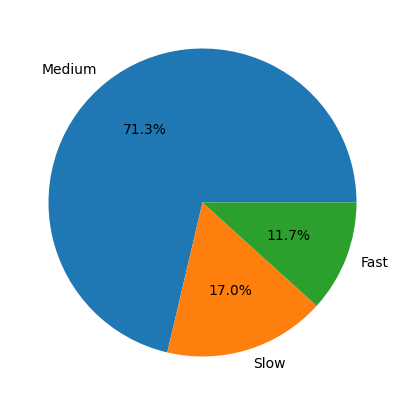

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.show()

* 17% deliveries are at Slow Speeds
* 71.3% deliveries are at Medium Speeds
* 11.7% deliveries are at Fast Speed

In [ ]:
df_cart2 = df_temp.copy()    # taking copy for comparison

### Source Destination Pairs With Top 10 Speeds

In [ ]:
df_temp[['source_destination_pair', 'avg_delivery_speed']].describe()

,avg_delivery_speed
count,837.000000
mean,0.451467
std,0.158162
min,0.035985
25%,0.341227
50%,0.445197
75%,0.563003
max,0.909742


In [ ]:
df_temp[['source_destination_pair', 'avg_delivery_speed']].sort_values(by=['avg_delivery_speed'], ascending=False).reset_index(drop=True).head(10)

,source_destination_pair,avg_delivery_speed
0,IND273155AAA-IND273303AAA,0.909742
1,IND561207AAB-IND562101AAA,0.905337
2,IND303301AAB-IND303303AAA,0.869215
3,IND424006AAA-IND425401AAA,0.857398
4,IND751015AAA-IND752050AAA,0.831643
5,IND764059AAA-IND764071AAB,0.826992
6,IND563101AAB-IND563131AAA,0.815165
7,IND764071AAB-IND764073AAA,0.806693
8,IND244901AAB-IND262001AAA,0.804233
9,IND360575AAA-IND362001AAA,0.800713


* Mean Delivery Speed is 0.45
* Top 10 Source Destination Pairs have Delivery Speeds in range of 0.8 to 0.9
* Skewness of 0.11, suggests Distribution peak is almmost at center.
* Kurtosis of -0.36 (negative Kurtosis) suggests Delivery speeds are more uniformly distributed across Source Destination Pairs.
* Efforts for increasing Delivery Speeds are required, as  Avg Delivery Speeds have negative Kurtosis and Skewness is almost Centered

### Confidence Interval

In [ ]:
mean_deliveries = df_temp['avg_delivery_speed'].mean()
std_deliveries = df_temp['avg_delivery_speed'].std() / df_temp.shape[0] ** 0.5

# Taking 99% Confidence Interval as Kurtosis is negative
z1 = norm.ppf(0.995)
z2 = norm.ppf(0.005)

l = np.round((mean_deliveries + z2 * std_deliveries), 2)
u = np.round((mean_deliveries + z1 * std_deliveries), 2)

print(f'With 99% Confidence, Confidence Interval of Average Delivery Speed {l, u}')

With 99% Confidence, Confidence Interval of Average Delivery Speed (0.44, 0.47)


## FTL Deliveries

### Distribution

<ipython-input-597-bda823e9cf56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ftl['delivery_speed'] = df_ftl['actual_distance_to_destination'] / df_ftl['actual_time']


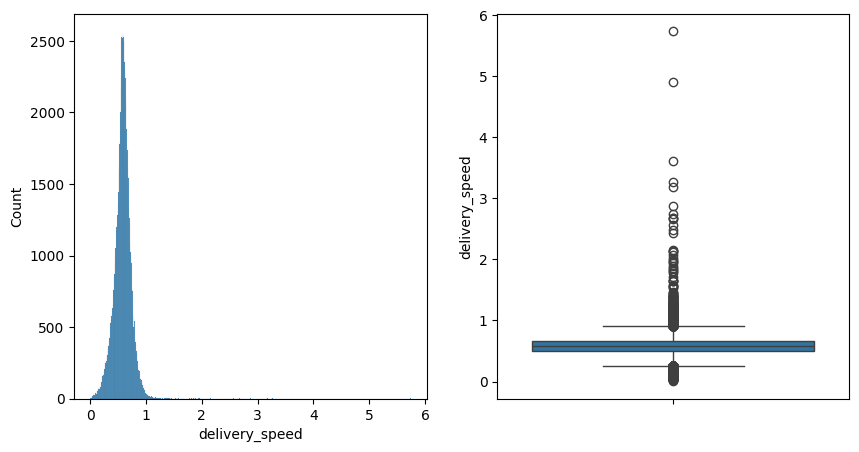

In [ ]:
df_ftl = df[df['route_type'] == 'FTL']
df_ftl['delivery_speed'] = df_ftl['actual_distance_to_destination'] / df_ftl['actual_time']


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_ftl['delivery_speed'])    # , bins=100

plt.subplot(1, 2, 2)
sns.boxplot(df_ftl['delivery_speed'])    # , bins=100

# plt.title()

plt.show()

### Source-Destination Delivery Speeds

In [ ]:
df_temp = df_ftl.groupby(['source_destination_pair']).agg({'delivery_speed': 'mean'}).reset_index().rename(columns={'delivery_speed': 'avg_delivery_speed'})   # 'trip_uuid'
print(df_temp.shape)
df_temp.head()

(1534, 2)


,source_destination_pair,avg_delivery_speed
0,IND000000AAS-IND000000AET,0.423122
1,IND000000AAS-IND783370AAC,0.550613
2,IND000000AAZ-IND443201AAA,0.216858
3,IND000000AAZ-IND444005AAB,0.298386
4,IND000000AAZ-IND444203AAA,0.248681


* FTL services are provided in 1534 Source Destination Pairs

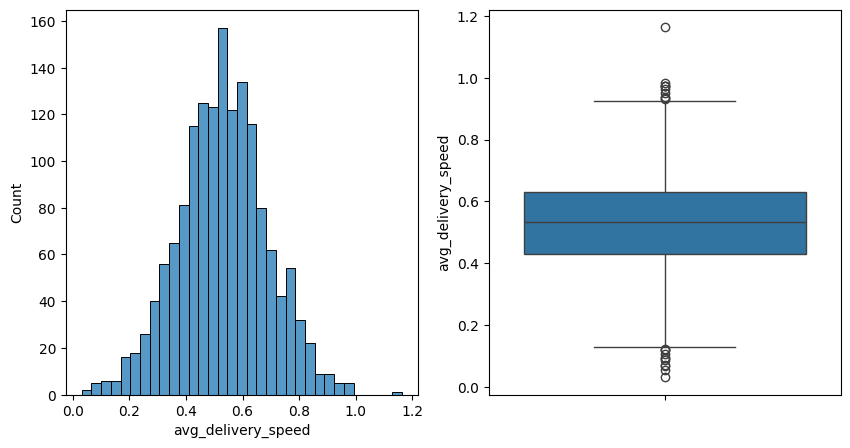

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_temp['avg_delivery_speed'])    # , bins=100

plt.subplot(1, 2, 2)
sns.boxplot(df_temp['avg_delivery_speed'])    # , bins=100

plt.show()

In [ ]:
stat, p_val = shapiro(df_temp['avg_delivery_speed'])

if p_val < 0.03:
  print(f'With {p_val} and 97% confidence, Delivery Speeds are not Normal Distributed')
else:
  print(f'With {p_val} and 97% confidence, Delivery Speeds are Normal Distributed')


With 0.2840295452340438 and 97% confidence, Delivery Speeds are Normal Distributed


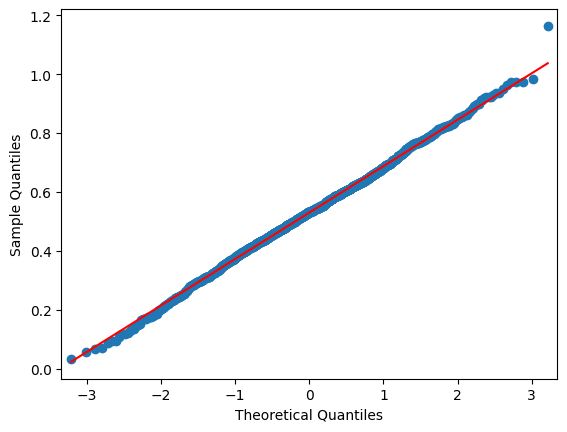

In [ ]:
qqplot(df_temp['avg_delivery_speed'], line='s')
plt.show()

In [ ]:
print(df_temp['avg_delivery_speed'].skew(), df_temp['avg_delivery_speed'].kurt()  )

0.0007921301106990374 0.17854672726456444


### Binning Delivery Speeds

In [ ]:
m = max(df_temp['avg_delivery_speed'])

bins = [0.0, 0.3, 0.65, m]
labels = ['Slow', 'Medium', 'Fast']

df_temp['delivery_speed_bin'] = pd.cut(df_temp['avg_delivery_speed'], bins=bins, labels = labels)
df_temp.head()

,source_destination_pair,avg_delivery_speed,delivery_speed_bin
0,IND000000AAS-IND000000AET,0.423122,Medium
1,IND000000AAS-IND783370AAC,0.550613,Medium
2,IND000000AAZ-IND443201AAA,0.216858,Slow
3,IND000000AAZ-IND444005AAB,0.298386,Slow
4,IND000000AAZ-IND444203AAA,0.248681,Slow


In [ ]:
s = df_temp['delivery_speed_bin'].value_counts()
s

,count
delivery_speed_bin,
Medium,1101
Fast,321
Slow,112


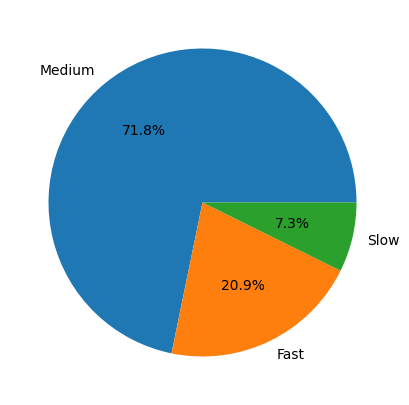

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.show()

* 7.3% deliveries are at Slow Speeds
* 71.8% deliveries are at Medium Speeds
* 20.9% deliveries are at Fast Speed

In [ ]:
df_ftl2 = df_temp.copy()      # taking ref for later comparison

### Source Destination Pairs With Top 10 Speeds

In [ ]:
df_temp[['source_destination_pair', 'avg_delivery_speed']].describe()

,avg_delivery_speed
count,1534.000000
mean,0.529882
std,0.157785
min,0.031311
25%,0.429105
50%,0.531697
75%,0.629269
max,1.163860


In [ ]:
df_temp[['source_destination_pair', 'avg_delivery_speed']].sort_values(by=['avg_delivery_speed'], ascending=False).reset_index(drop=True).head(10)

,source_destination_pair,avg_delivery_speed
0,IND152107AAA-IND152116AAA,1.163860
1,IND345001AAA-IND345021AAA,0.982792
2,IND344001AAA-IND345001AAA,0.973990
3,IND148101AAA-IND151001AAA,0.973711
4,IND385320AAA-IND385340AAB,0.972599
5,IND140401AAA-IND147301AAA,0.964757
6,IND342301AAA-IND345021AAA,0.950278
7,IND306902AAA-IND307001AAA,0.937505
8,IND344001AAA-IND344022AAB,0.935838
9,IND573103AAA-IND577116AAA,0.929753


* Mean Delivery Speed is 0.52
* Top 10 Source Destination Pairs have Delivery Speeds in range of 0.93 to 1.16
* Skewness of 0, suggests Distribution peak is at the Center.
* Kurtosis of 0.18 (slightly positive Kurtosis) suggests Delivery speeds are more uniformly distributed across Source Destination Pairs.
* Efforts for increasing Delivery Speeds are required, as  Avg Delivery Speeds have Kurtosis of 0.18 and Skewness is Centered.

### Confidence Interval

In [ ]:
mean_deliveries = df_temp['avg_delivery_speed'].mean()
std_deliveries = df_temp['avg_delivery_speed'].std() / df_temp.shape[0] ** 0.5

# Taking 99% Confidence Interval as Kurtosis is negative
z1 = norm.ppf(0.995)
z2 = norm.ppf(0.005)

l = np.round((mean_deliveries + z2 * std_deliveries), 2)
u = np.round((mean_deliveries + z1 * std_deliveries), 2)

print(f'With 99% Confidence, Confidence Interval of Average Delivery Speed {l, u}')

With 99% Confidence, Confidence Interval of Average Delivery Speed (0.52, 0.54)


## Carting vs FTL

In [ ]:
stat, p_val = ttest_ind(df_cart2['avg_delivery_speed'], df_ftl2['avg_delivery_speed'])

if p_val < 0.001:
  print(f'{p_val} and 99% confidence suggest that FTL Delivery Speeds are faster than Cart Deliveries')
else:
  print(f'{p_val} and 99% confidence suggest that FTL Delivery Speeds are same as Cart Deliveries')


4.375818059065075e-30 and 99% confidence suggest that FTL Delivery Speeds are faster than Cart Deliveries


In [ ]:
print(df_cart2.shape, df_ftl2.shape)

(837, 3) (1534, 3)


# OSRM Time vs Actual Time

## Distribution

In [ ]:
df[['osrm_time', 'actual_time']].describe()

,osrm_time,actual_time
count,144867.000000,144867.000000
mean,213.868272,416.927527
std,308.011085,598.103621
min,6.000000,9.000000
25%,27.000000,51.000000
50%,64.000000,132.000000
75%,257.000000,513.000000
max,1686.000000,4532.000000


In [ ]:
print(df['osrm_time'].skew(), df['actual_time'].skew() )

2.045165965158787 2.0680650189677094


* Delivery Times are highly right skewed, taking Median Delivery times for aggregation will be suitable.  

In [ ]:
df_time = df.groupby(['source_destination_pair']).agg({
                                                      'osrm_time': 'median',
                                                      'actual_time': 'median'
                                                      }).reset_index()

df_time.head()
df_time = df_time.rename(columns={'osrm_time': 'median_osrm_time', 'actual_time': 'median_actual_time'})

df_time['time_difference_percent'] =  ((df_time['median_actual_time'] - df_time['median_osrm_time']) / df_time['median_osrm_time']) * 100

df_time.head(3)

,source_destination_pair,median_osrm_time,median_actual_time,time_difference_percent
0,IND000000AAL-IND411033AAA,24.0,60.5,152.083333
1,IND000000AAQ-IND700028AAB,12.5,79.5,536.000000
2,IND000000AAS-IND000000AET,45.0,106.0,135.555556


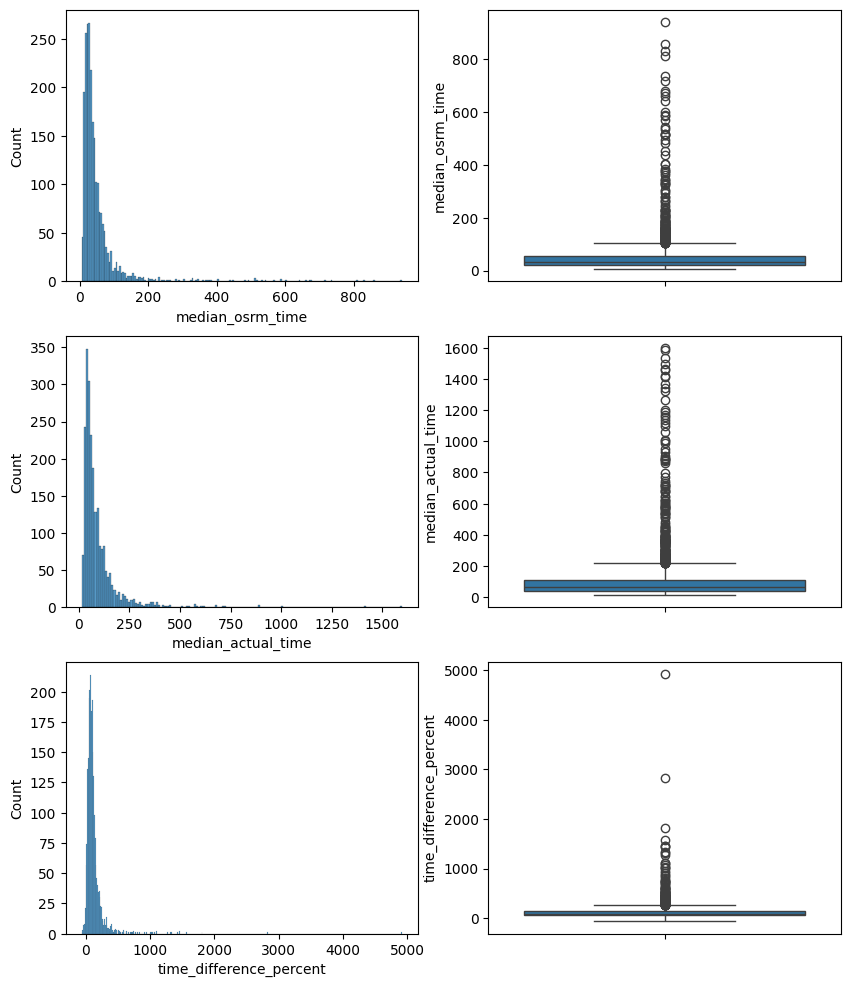

In [ ]:
def plot_distribution(df, col1, col2, col3):

  plt.figure(figsize=(10, 12))

  plt.subplot(3, 2, 1)
  sns.histplot(df[col1])    # , bins=100

  plt.subplot(3, 2, 2)
  sns.boxplot(df[col1])    # , bins=100

  plt.subplot(3, 2, 3)
  sns.histplot(df[col2])    # , bins=100

  plt.subplot(3, 2, 4)
  sns.boxplot(df[col2])    # , bins=100

  plt.subplot(3, 2, 5)
  sns.histplot(df[col3])    # , bins=100

  plt.subplot(3, 2, 6)
  sns.boxplot(df[col3])    # , bins=100

  plt.show()

plot_distribution(df_time, 'median_osrm_time', 'median_actual_time', 'time_difference_percent')


In [ ]:
df_time.describe()

,median_osrm_time,median_actual_time,time_difference_percent
count,2344.000000,2344.000000,2344.000000
mean,52.364761,109.621374,123.037963
std,73.741217,160.020466,177.049134
min,6.000000,13.500000,-61.025641
25%,22.000000,42.000000,56.830445
50%,34.000000,64.000000,92.000000
75%,55.000000,112.000000,137.281977
max,941.000000,1598.000000,4915.000000


In [ ]:
print(df_time['time_difference_percent'].skew(), df_time['time_difference_percent'].kurt())

12.39310288385707 265.6594992439143


In [ ]:
print(f"Percent deliveries completing within OSRM Time are { (df_time[df_time['time_difference_percent'] <= 0].shape[0] / df_time.shape[0]) * 100 }%")


Percent deliveries completing within OSRM Time are 1.9624573378839592%


* Median of Actual Delivery Time is 42.
* Median of OSRM time is 34.
* Skewness of Time Difference in highly Positive (12.4), most of deliveries are completing in comparatively shorter time difference percentage  from OSRM time.
* Kurtosis is highly Positive (265.65), suggesting most of deliveries are concentrated at shorter time difference percentage from OSRM time.
* But, Median Difference Percentage between OSRM Time and Actual Time is 92%, so there is still a vast difference between OSRM and Actual Time.
* Only 1.96% Deliveries matched to OSRM Time.
* Better strategies to meet OSRM time are required, or OSRM time reference is not practical for gauging Delivery Times.


## Percent Delivery Times Closer to OSRM Time

In [ ]:
df_time['within_110'] = df_time['median_actual_time'] <= df_time['median_osrm_time'] * 1.1
df_time['within_120'] = df_time['median_actual_time'] <= df_time['median_osrm_time'] * 1.2
df_time['within_130'] = df_time['median_actual_time'] <= df_time['median_osrm_time'] * 1.3

df_time.head(3)

,source_destination_pair,median_osrm_time,median_actual_time,time_difference_percent,within_110,within_120,within_130
0,IND000000AAL-IND411033AAA,24.0,60.5,152.083333,False,False,False
1,IND000000AAQ-IND700028AAB,12.5,79.5,536.000000,False,False,False
2,IND000000AAS-IND000000AET,45.0,106.0,135.555556,False,False,False


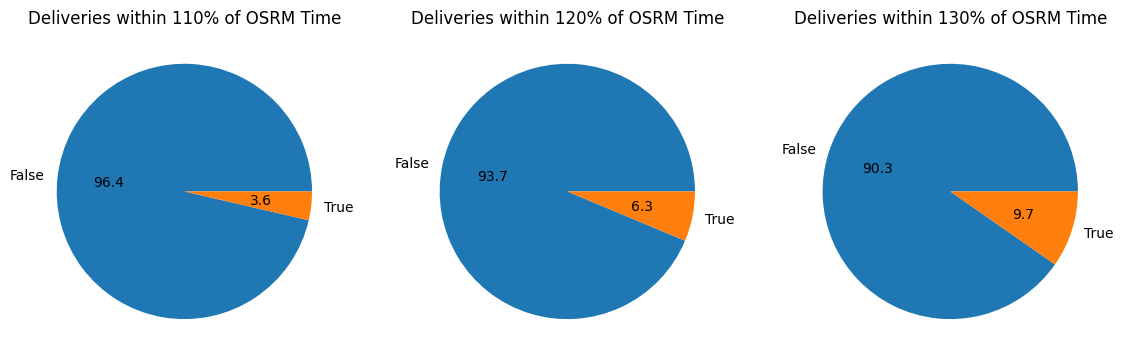

In [ ]:
plt.figure(figsize=(14, 14))

plt.subplot(1,3,1)
plt.pie(df_time['within_110'].value_counts(), labels=df_time['within_110'].value_counts().index, autopct='%1.1f')
plt.title('Deliveries within 110% of OSRM Time')

plt.subplot(1,3,2)
plt.pie(df_time['within_120'].value_counts(), labels=df_time['within_120'].value_counts().index, autopct='%1.1f')
plt.title('Deliveries within 120% of OSRM Time')

plt.subplot(1,3,3)
plt.pie(df_time['within_130'].value_counts(), labels=df_time['within_130'].value_counts().index, autopct='%1.1f')
plt.title('Deliveries within 130% of OSRM Time')

plt.show()

* 3.6% Deliveries completed within 110% of OSRM Time
* 6.3% Deliveries completed within 120% of OSRM Time
* 9.7% Deliveries completed within 130% of OSRM Time

* There is significant deviation from of Delivery time from OSRM Time. Deliveries are clearly not meeting OSRM Time.

## Delivery Time Factor

<Figure size 1000x500 with 0 Axes>

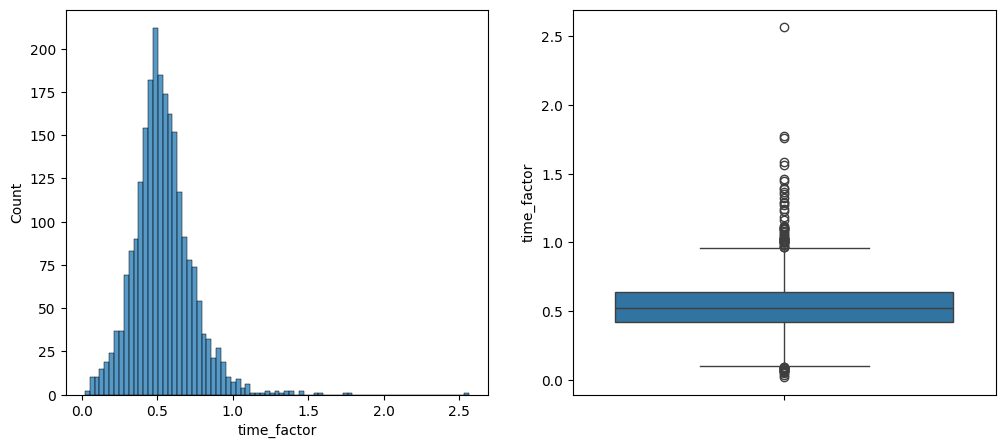

In [ ]:
df_time['time_factor'] = df_time['median_osrm_time'] / df_time['median_actual_time']

def plot_dist(df, col1):
  plt.figure(figsize=(10, 5))
  plt.figure(figsize=(12,5))

  plt.subplot(1,2,1)
  sns.histplot(df[col1])

  plt.subplot(1,2,2)
  sns.boxplot(df[col1])

  plt.show()

plot_dist(df_time, 'time_factor')

### Removing Outliers for Further Analysis

In [ ]:
q1 = df_time['time_factor'].quantile(0.25)
q3 = df_time['time_factor'].quantile(0.75)

iqr =  q3 - q1

print(q1, q3, iqr)

0.4214396284829721 0.6376312990293843 0.2161916705464122


<Figure size 1000x500 with 0 Axes>

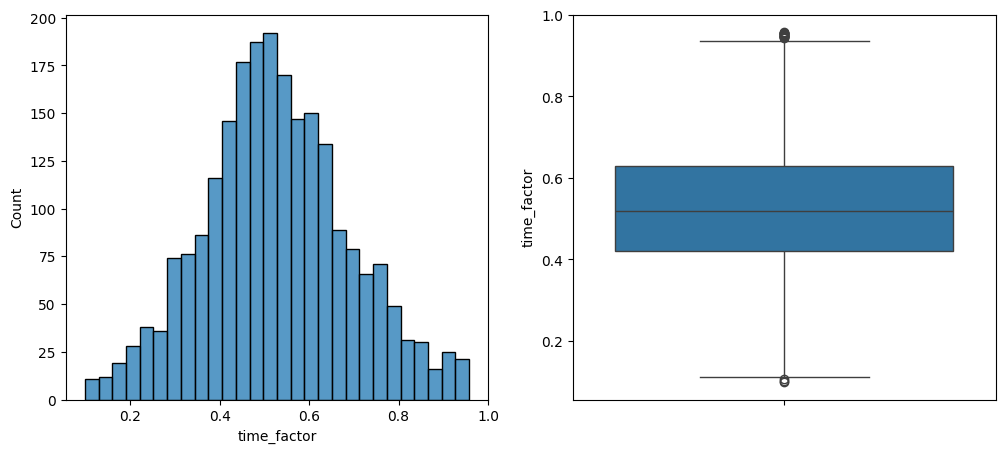

In [ ]:
df_time1 = df_time[ ~((df_time['time_factor'] > (q3 + 1.5 * iqr)) | (df_time['time_factor'] < (q1 - 1.5*iqr))) ].copy()
# print(df_time1.shape, df_time.shape)

plot_dist(df_time1, 'time_factor')

In [ ]:
print(f"Percent values that were Outliers: {((df_time.shape[0] - df_time1.shape[0])/ df_time.shape[0]) *100  }%")

Percent values that were Outliers: 2.901023890784983%


In [ ]:
df_time1['time_factor'].describe()

,time_factor
count,2276.000000
mean,0.526846
std,0.163474
min,0.098918
25%,0.421440
50%,0.518295
75%,0.628626
max,0.957746


* Mean and Median are close by, we can test for Normal Distribution

In [ ]:
stat, p_val = shapiro(df_time1['time_factor'])

if p_val < 0.01:
  print(f'With {p_val} and 99% confidence, Delivery Factor Factor is Not Normal Distributed')
else:
  print(f'With {p_val} and 99% confidence, Delivery Factor is Normal Distributed')

With 2.5177207375521852e-06 and 99% confidence, Delivery Factor Factor is Not Normal Distributed


In [ ]:
print(f"Most Deliveries are taking {(1/df_time1['time_factor'].median()) *100}% of OSRM Time")

Most Deliveries are taking 192.94016358157558% of OSRM Time


In [ ]:
print(df_time1['time_factor'].skew(), df_time1['time_factor'].kurt())

0.14366467944625427 -0.08944222988255834


## Hypothesis Validation

In [ ]:
stat, p_val = kruskal(df_time['median_osrm_time'], df_time['median_actual_time'])

if p_val < 0.01:
  print(f'P-value of {p_val} and 99% confidence suggest that Actual Time is larger than Median OSRM Time')
else:
  print(f'P-value of {p_val} and 99% confidence suggest that Actual Time is larger than Median OSRM Time')

P-value of 7.848069340149569e-204 and 99% confidence suggest that Actual Time is larger than Median OSRM Time


## Top 10 Source Destination Pairs Satisfying OSRM Time

In [ ]:
df_time[['source_destination_pair', 'median_osrm_time',	'median_actual_time',	'time_difference_percent']].sort_values(by='time_difference_percent', ascending=True).reset_index(drop=True).head(10)

,source_destination_pair,median_osrm_time,median_actual_time,time_difference_percent
0,IND244501AAA-IND246761AAA,97.5,38.0,-61.025641
1,IND792001AAA-IND792103AAB,87.0,49.0,-43.678161
2,IND732139AAA-IND732204AAB,58.0,33.0,-43.103448
3,IND243301AAB-IND244412AAA,80.0,50.5,-36.875000
4,IND465333A1B-IND465333AAA,72.0,46.0,-36.111111
5,IND209206AAB-IND209304AAA,57.0,39.0,-31.578947
6,IND624101AAA-IND624202AAA,108.5,75.0,-30.875576
7,IND344001AAA-IND345001AAA,130.0,93.0,-28.461538
8,IND151001AAA-IND151302AAA,41.0,29.5,-28.048780
9,IND385320AAA-IND385340AAB,31.5,23.0,-26.984127


# OSRM Distance vs Actual Distance

## Distribution

In [ ]:
df[['osrm_distance', 'actual_distance_to_destination']].describe()

,osrm_distance,actual_distance_to_destination
count,144867.000000,144867.000000
mean,284.771297,234.073372
std,421.119294,344.990009
min,9.008200,9.000045
25%,29.914700,23.355874
50%,78.525800,66.126571
75%,343.193250,286.708875
max,2326.199100,1927.447705


In [ ]:
print(df['osrm_distance'].skew(), df['actual_distance_to_destination'].skew() )

2.048235905586654 1.9911048254267958


* OSRM Distance and Actual Distance are Right skewed taking Median (on aggregation at Source-Distance Pair) will be appropriate.

In [ ]:
df_dist = df.groupby(['source_destination_pair']).agg({
                                                      'osrm_distance': 'median',
                                                      'actual_distance_to_destination': 'median'
                                                      }).reset_index()

df_dist = df_dist.rename(columns={'osrm_distance': 'median_osrm_distance', 'actual_distance_to_destination': 'median_actual_distance'})

df_dist['distance_difference_percent'] = ((df_dist['median_actual_distance'] - df_dist['median_osrm_distance']) / df_dist['median_osrm_distance']) * 100

df_dist.head(3)

,source_destination_pair,median_osrm_distance,median_actual_distance,distance_difference_percent
0,IND000000AAL-IND411033AAA,23.53235,15.196988,-35.420866
1,IND000000AAQ-IND700028AAB,12.49230,10.350604,-17.144132
2,IND000000AAS-IND000000AET,63.65480,44.524718,-30.052850


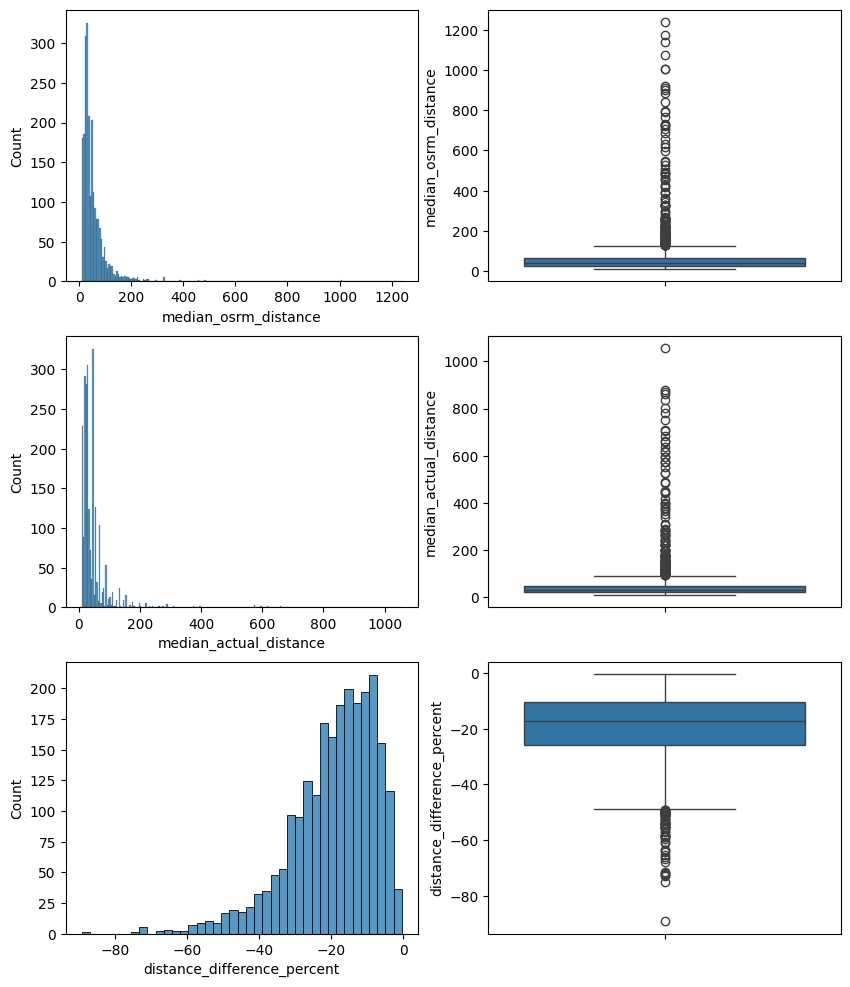

In [ ]:
plot_distribution(df_dist, 'median_osrm_distance', 'median_actual_distance', 'distance_difference_percent')

In [ ]:
df_dist.describe()

,median_osrm_distance,median_actual_distance,distance_difference_percent
count,2344.000000,2344.000000,2344.000000
mean,63.918140,51.332081,-19.300694
std,99.428403,81.804706,12.009627
min,9.654800,9.028852,-89.149101
25%,25.945925,20.944260,-25.774177
50%,38.125050,30.051584,-17.031950
75%,66.111200,49.726949,-10.320089
max,1239.675900,1056.533019,-0.342170


In [ ]:
print(df_dist['distance_difference_percent'].skew(), df_dist['distance_difference_percent'].kurt())

-1.187886534631071 2.0318917551602538


In [ ]:
print(f"Percent deliveries completing at OSRM Distance are { (df_dist[df_dist['distance_difference_percent'] < 0].shape[0] / df_dist.shape[0]) * 100 }%")


Percent deliveries completing at OSRM Distance are 100.0%


* Median of Actual Delivery Distance is 9.02.
* Median of OSRM distance is 9.65.
* Median Difference between Actual Distance and OSRM Distance is -17%, so most deliveries are completing in smaller distance than OSRM Distance.
* Skewness of Distance Difference Percentage in Negative (-1.2), most of deliveries are completing closer to OSRM distance.
* Kurtosis of Distance Difference Percentage is Positive (2%), suggesting most of deliveries are concentrated closer to OSRM distance.
* 100% Deliveries completed in lesser distance than OSRM Distance.
* Delhivery is performing perfectly as per OSRM Distance.

## Delivery Distance Factor

In [ ]:
df_dist.head(3)

,source_destination_pair,median_osrm_distance,median_actual_distance,distance_difference_percent
0,IND000000AAL-IND411033AAA,23.53235,15.196988,-35.420866
1,IND000000AAQ-IND700028AAB,12.49230,10.350604,-17.144132
2,IND000000AAS-IND000000AET,63.65480,44.524718,-30.052850


<Figure size 1000x500 with 0 Axes>

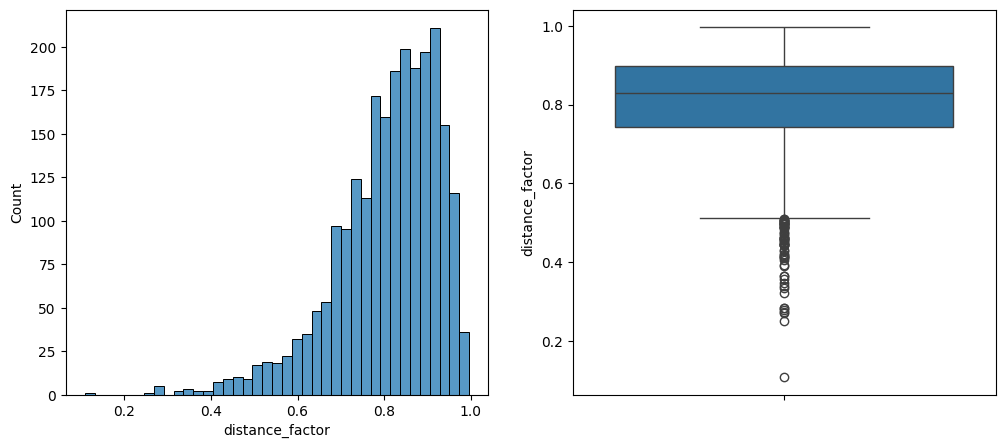

In [ ]:
df_dist['distance_factor'] = df_dist['median_actual_distance'] / df_dist['median_osrm_distance']

plot_dist(df_dist, 'distance_factor')

### Removing Outliers for Further Analysis

In [ ]:
q1 = df_dist['distance_factor'].quantile(0.25)
q3 = df_dist['distance_factor'].quantile(0.75)

iqr =  q3 - q1

print(q1, q3, iqr)

0.7422582255674652 0.8967991057410917 0.15454088017362644


<Figure size 1000x500 with 0 Axes>

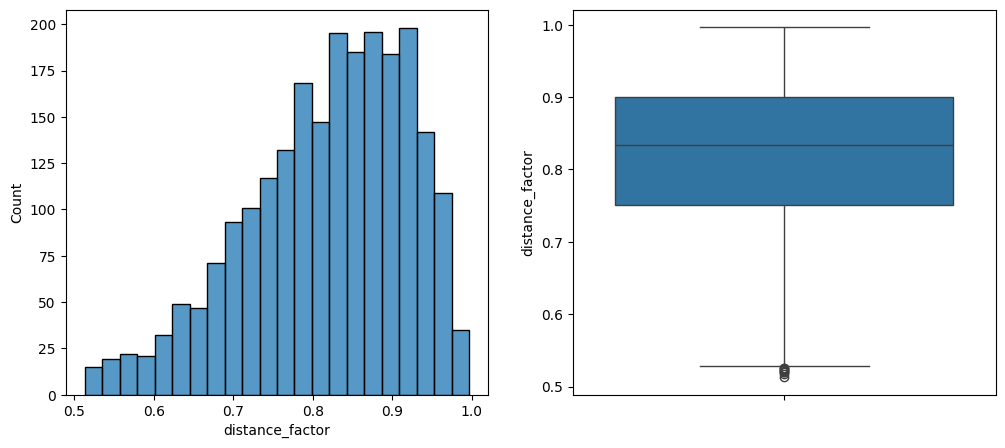

In [ ]:
df_dist1 = df_dist[ ~((df_dist['distance_factor'] > (q3 + 1.5 * iqr)) | (df_dist['distance_factor'] < (q1 - 1.5*iqr))) ].copy()

plot_dist(df_dist1, 'distance_factor')

In [ ]:
print(f"Percent values that were Outliers: {((df_dist.shape[0] - df_dist1.shape[0])/ df_dist.shape[0]) *100  }%")

Percent values that were Outliers: 2.8156996587030716%


In [ ]:
print(f"Most Deliveries are routing through {(df_dist1['distance_factor'].median()) *100}% of OSRM Distance")

Most Deliveries are routing through 83.36178210161944% of OSRM Distance


## Hypothesis Validation

In [ ]:
stat, p_val = kruskal(df_dist['median_osrm_distance'], df_dist['median_actual_distance'])

if p_val < 0.01:
  print(f'Performing Kruskal Test, P-value of {p_val} and 99% confidence suggest that Median Actual Distance is smaller than Median OSRM Distance')
else:
  print(f'Performing Kruskal Test, P-value of {p_val} and 99% confidence suggest that Median Actual Distance is same as Median OSRM Distance')

Performing Kruskal Test, P-value of 1.1598178598208581e-29 and 99% confidence suggest that Median Actual Distance is smaller than Median OSRM Distance


## Top 10 Source Destination Pairs With Shortest Routes

In [ ]:
df_dist[['source_destination_pair', 'median_osrm_distance',	'median_actual_distance',	'distance_difference_percent']].sort_values(by='distance_difference_percent', ascending=True).reset_index(drop=True).head(10)

,source_destination_pair,median_osrm_distance,median_actual_distance,distance_difference_percent
0,IND741165AAB-IND742121AAB,87.40560,9.484293,-89.149101
1,IND742102AAB-IND742121AAB,92.08945,23.024096,-74.998117
2,IND781005AAA-IND781018AAB,36.15435,9.809440,-72.867884
3,IND781018AAA-IND781018AAB,34.06190,9.355751,-72.533092
4,IND781018AAB-IND781022AAA,36.23920,10.102426,-72.122934
5,IND711303AAA-IND721134AAB,43.83895,12.414759,-71.680984
6,IND792001AAA-IND792103AAB,123.76100,35.114048,-71.627533
7,IND232104AAB-IND233221AAC,70.85665,22.811449,-67.806199
8,IND732139AAA-IND732204AAB,40.38990,13.482172,-66.619943
9,IND465001AAA-IND465333A1B,66.58810,22.588217,-66.077698


# Trips Across Top 5 Route Schedules

In [ ]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_destination_pair,trip_creation_date,trip_creation_hour,order_creation_delay
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,IND388121AAA-IND388620AAB,2018-09-20,2,45.932363
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,IND388121AAA-IND388620AAB,2018-09-20,2,45.932363
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,IND388121AAA-IND388620AAB,2018-09-20,2,45.932363


## Getting Top 5 Routes Schedules - Based on Minimum Percent Time Taken

In [ ]:
df_route = df.groupby(['route_schedule_uuid']).agg({
                                                      'osrm_time': 'median',
                                                      'actual_time': 'median'
                                                      }).reset_index()

df_route = df_route.rename({'osrm_time': 'median_osrm_time', 'actual_time': 'median_actual_time'}, axis=1)

df_route['time_difference_percent'] =  ((df_route['median_actual_time'] - df_route['median_osrm_time']) / df_route['median_osrm_time']) * 100

df_route.sort_values(by= ['time_difference_percent'],ascending=True).reset_index(drop=True).head(5)

,route_schedule_uuid,median_osrm_time,median_actual_time,time_difference_percent
0,thanos::sroute:bf7b9066-322c-4cb2-bb71-16984d8...,34.5,28.0,-18.840580
1,thanos::sroute:387e7ab9-2237-48b1-af49-2508ce2...,40.0,34.0,-15.000000
2,thanos::sroute:d1ee5ba3-6364-497d-884c-e5bc024...,69.5,61.5,-11.510791
3,thanos::sroute:eb7227b4-9497-4ae2-ace1-a0c8f97...,86.5,77.5,-10.404624
4,thanos::sroute:78426d0e-d964-49d2-8510-e89ff18...,35.0,33.5,-4.285714


In [ ]:
# extracting top 5 Route Schedules

df_route = df_route.loc[0:5, :]

top_routes = df_route['route_schedule_uuid'].unique()
print(top_routes)


['thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df059f7'
 'thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3cd8bf'
 'thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b4cd94'
 'thanos::sroute:00b294b8-d2c3-4bca-a3be-684f46278bdd'
 'thanos::sroute:01164881-301e-45f8-bacd-ee21c37f1cc4'
 'thanos::sroute:011f94ad-57cf-4005-9734-f5b8a4d9cb59']


## Trip-wise Variation of Time Difference in a Route Schedule

In [ ]:
itr = 0
for route in list(top_routes):
  itr+=1
  df_route1 = df[df['route_schedule_uuid'] == route]

  df_route1 = df_route1.groupby(['route_schedule_uuid', 'trip_uuid' ]).agg({
                                                        'osrm_time': 'median',
                                                        'actual_time': 'median'
                                                        }).reset_index()

  df_route1 = df_route1.rename({'osrm_time': 'median_osrm_time', 'actual_time': 'median_actual_time'}, axis=1)

  df_route1['time_difference_percent'] =  ((df_route1['median_actual_time'] - df_route1['median_osrm_time']) / df_route1['median_osrm_time']) * 100

  # print(f'--------------Route {itr}-{route}--------------')

  if df_route1['time_difference_percent'].min() !=0 :
    diff_percent = ((df_route1['time_difference_percent'].max() - df_route1['time_difference_percent'].min()) / df_route1['time_difference_percent'].min()) * 100
  else:
    diff_percent = ((df_route1['time_difference_percent'].max() - df_route1['time_difference_percent'].min()) / 1) * 100

  print(f"Percent Variation in Delivery Time for Route {itr} {route} : {  np.round(diff_percent, 2)    } %")

  # print(df_route1.describe())
  # print(df_route1)


  print('\n')


Percent Variation in Delivery Time for Route 1 thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df059f7 : 427.76 %


Percent Variation in Delivery Time for Route 2 thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3cd8bf : 223.97 %


Percent Variation in Delivery Time for Route 3 thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b4cd94 : 60.89 %


Percent Variation in Delivery Time for Route 4 thanos::sroute:00b294b8-d2c3-4bca-a3be-684f46278bdd : 81.98 %


Percent Variation in Delivery Time for Route 5 thanos::sroute:01164881-301e-45f8-bacd-ee21c37f1cc4 : 283.07 %


Percent Variation in Delivery Time for Route 6 thanos::sroute:011f94ad-57cf-4005-9734-f5b8a4d9cb59 : 18400.0 %




* Considering top 5 Route Schedules as sample, time taken by constituting Trips varies extremely.
* This should be controlled and efforts to maintain them consistent will significantly improve reliability and Customer Satisfaction.